<a href="https://colab.research.google.com/github/emanbuc/ML-GAN/blob/main/Signal_generation_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Network - (GAN) 

> “Generative Adversarial Network— the most interesting idea in the last ten years in machine learning” by Yann LeCun, VP & Chief AI Scientist at Facebook, Godfather of AI.

Generative Adversarial Network (GAN) is an old idea arising from the game theory, they were introduced to the machine learning community in 2014 by Ian J. Goodfellow and co-authors in the article Generative Adversarial Nets.


Generative adversarial networks (GANs) are an exciting recent innovation in machine learning. GANs are generative models: they create new data instances that resemble your training data. For example, GANs can create images that look like photographs of human faces, even though the faces don't belong to any real person.

![Images generated by a GAN created by NVIDIA](https://developers.google.com/machine-learning/gan/images/gan_faces.png)
Figure 1: [Images generated by a GAN created by NVIDIA.](https://research.nvidia.com/sites/default/files/pubs/2017-10_Progressive-Growing-of/karras2018iclr-paper.pdf)


## Generative Model

"Generative" describes a class of statistical models that contrasts with discriminative models.

Informally:


*   Generative models can generate new data 

*  Discriminative models discriminate between different kinds of data instances

A generative model could generate new photos of animals that look like real animals, while a discriminative model could tell a dog from a cat. GANs are just one kind of generative model.

More formally, given a set of data instances X and a set of labels Y:

Generative models capture the joint probability p(X, Y), or just p(X) if there are no labels.
Discriminative models capture the conditional probability p(Y | X).


A generative model includes the distribution of the data itself, and tells you how likely a given example is. For example, models that predict the next word in a sequence are typically generative models (usually much simpler than GANs) because they can assign a probability to a sequence of words.

A discriminative model ignores the question of whether a given instance is likely, and just tells you how likely a label is to apply to the instance.

Note that this is a very general definition. There are many kinds of generative model. GANs are just one kind of generative model.



## The Game of Probabilities 
From [Generative Adversarial Network (GAN) for Dummies — A Step By Step Tutorial](https://towardsdatascience.com/generative-adversarial-network-gan-for-dummies-a-step-by-step-tutorial-fdefff170391)

Generating new data is a game of probabilities. When we are observing the world around us and collecting data, we are performing an experiment. A simple example is taking a photo of a celebrity's face.

This can be considered as a probabilistic experiment, with an unknown outcome X, also called a random variable.

For example, we can define the probability that the face will be that of Tyrese, the famous celebrity singer.

![](https://miro.medium.com/max/141/1*idI7l3JkxRXxoI8xiqLzlA.png)

Tyrese Gibson
All possible outcomes of such experiments build the so-called sample space, denoted Ω (all possible celebrity faces) 


![https://miro.medium.com/max/399/0*9_sm2wxAUGclWjEA.png](https://miro.medium.com/max/399/0*9_sm2wxAUGclWjEA.png)

Therefore we can consider probability as a function that takes an outcome, i.e. an element from the sample space (a photo) and maps the outcome to a non-negative real number so that the sum of all these numbers equals 1.

We also call this a probability distribution function P(X). When we know the sample space (all possible celebrity faces) and the probability distribution (the probability of occurrence of each face), we have the full description of the experiment and we can reason about uncertainty.

Generating new faces can be expressed by a random variable generation problem. The face is described by random variables, represented through its RGB values, flatten into a vector of N numbers.
The celebrity faces are 218px height, 178px width with 3 color channels. Therefore each vector is 116412-dimensional.
If we build a space with 116412 (N) axes, each face will be a point in that space. A celebrity-face probability distribution function P(X) would map each face to a non-negative real number so that the sum of all these numbers for all faces equals 1.

Some points of that space are very likely to represent celebrity faces whereas it is highly unlikely for some others.

![](https://miro.medium.com/max/645/1*XLCCQeGArsYHrcd9CJWkSg.png)


### How to generate random variables from complex distributions?

The celebrity-face probability distribution over the N-dimensional vector space is a very complex one and we don’t know how to directly generate complex random variables.

Luckily, we can represent our complex random variable by a function applied to a uniform random variable. This is the idea of the transform method. It first generates N uncorrelated uniform random variables, which is easy. It then applies a very complex function to that simple random variable! Very complex functions are naturally approximated by a neural network. After training the network will be able to take as input a simple N-dimensional uniform random variable and return another N-dimensional random variable that would follow our celebrity-face probability distribution. This is the core motivation behind generative adversarial networks.

> In simple words, a GAN would generate a random variable with respect to a specific probability distribution.

### Why Generative Adversarial Networks?

Theoretically, we would compare the true distribution versus the generated distribution based on samples using the Maximum Mean Discrepancy (MMD) approach.

This would give a distribution matching error that could be used to update the network via backpropagation. This direct method is practically very complex to implement.

> Instead of directly comparing both true and generated distributions, GANs solve a non-discrimination task between true and generated samples

### Generative Models are HArd

From : [generative-models-are-hard](https://developers.google.com/machine-learning/gan/generative#generative-models-are-hard)


Generative models tackle a more difficult task than analogous discriminative models. Generative models have to model more.

A generative model for images might capture correlations like "things that look like boats are probably going to appear near things that look like water" and "eyes are unlikely to appear on foreheads." These are very complicated distributions.

In contrast, a discriminative model might learn the difference between "sailboat" or "not sailboat" by just looking for a few tell-tale patterns. It could ignore many of the correlations that the generative model must get right.

Discriminative models try to draw boundaries in the data space, while generative models try to model how data is placed throughout the space. For example, the following diagram shows discriminative and generative models of handwritten digits:

![](https://developers.google.com/machine-learning/gan/images/generative_v_discriminative.png)

The discriminative model tries to tell the difference between handwritten 0's and 1's by drawing a line in the data space. If it gets the line right, it can distinguish 0's from 1's without ever having to model exactly where the instances are placed in the data space on either side of the line.

In contrast, the generative model tries to produce convincing 1's and 0's by generating digits that fall close to their real counterparts in the data space. It has to model the distribution throughout the data space.

GANs offer an effective way to train such rich models to resemble a real distribution. To understand how they work we'll need to understand the basic structure of a GAN.

A generative adversarial network (GAN) has two parts:

- The generator learns to generate plausible data. The generated instances become negative training examples for the discriminator.
- The discriminator learns to distinguish the generator's fake data from real data. The discriminator penalizes the generator for producing implausible results.

![](https://developers.google.com/machine-learning/gan/images/gan_diagram.svg)

Both the generator and the discriminator are neural networks. The generator output is connected directly to the discriminator input. Through backpropagation, the discriminator's classification provides a signal that the generator uses to update its weights.

Let's explain the pieces of this system in greater detail.

### The Discriminator

The discriminator in a GAN is simply a classifier. It tries to distinguish real data from the data created by the generator. It could use any network architecture appropriate to the type of data it's classifying.

The discriminator's training data comes from two sources:

- Real data instances, such as real pictures of people. The discriminator uses these instances as positive examples during training.
- Fake data instances created by the generator. The discriminator uses these instances as negative examples during training.-



## GAN Architecture

A GAN has three primary components: a generator model for generating new data, a discriminator model for classifying whether generated data are real faces, or fake, and the adversarial network that pits them against each other.

The generative part is responsible for taking N-dimensional uniform random variables (noise) as input and generating fake faces. The generator captures the probability P(X), where X is the input.
The discriminative part is a simple classifier that evaluates and distinguished the generated faces from true celebrity faces. The discriminator captures the conditional probability P(Y|X), where X is the input and Y is the label.

## Training Generative Adversarial Networks

The generative network is trained to maximize the final classification error (between true and generated data), while the discriminative network is trained to minimize it. This is where the notion of adversarial networks arises from.
From the perspective of game theory, equilibrium is reached when the generator produces samples that follow the celebrity-face probability distribution and the discriminator predicts fake or not-fake with equal probability as if it would just flip a coin.
It is important that both networks learn equally during training and converge together. A typical situation occurs when the discriminative network becomes much better at recognizing fakes, causing the generative network to be stuck.

During discriminator training, we ignore the generator loss and just use the discriminator loss, which penalizes the discriminator for misclassifying real faces as fake or generated faces as real. The generator’s weights are updated through backpropagation. Generator’s weights are not updated.
During generator training, we use the generator loss, which penalizes the generator for failing to fool the discriminator and generating a face that the discriminator classifies as fake. The discriminator is frozen during generator training and only generator’s weights are updated through backpropagation.
This is the magic that synthesizes celebrity faces using GANs. Convergence is often observed as fleeting, rather than stable. When you get everything right, GANs provide unbelievable results as demonstrated below.


In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
#It’s a good practice to set up a random generator seed so that the experiment can be replicated identically on any machine. 
#To do that in PyTorch:
torch.manual_seed(123)

# Sinusoidal signal generator GAN

## Preparing the Training Data Sin(x)
The training data is composed of pairs (x₁, x₂) so that x₂ consists of the value of the sine of x₁ for x₁ in the interval from 0 to 2π

In [ ]:
train_data_length = 1024
# initialize train_data, a tensor with dimensions of <train_data_length> rows and 2 columns, all containing zeros. 
# Note: A tensor is a multidimensional array similar to a NumPy array.
train_data = torch.zeros((train_data_length, 2))

# the first column of train_data store random values in the interval from 0 to 2π.
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)

# calculate the second column of the tensor as the sine of the first column.
train_data[:, 1] = torch.sin(train_data[:, 0])

# init tensor of labels, which are required by PyTorch’s data loader. 
# Since GANs make use of unsupervised learning techniques, the labels can be anything.
train_labels = torch.zeros(train_data_length)

# create train_set as a list of tuples, with each row of train_data and train_labels represented in each tuple 
# this is the format expected by PyTorch’s data loader.
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

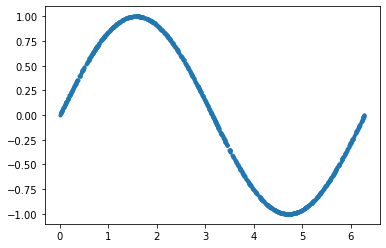

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

## Implementing the Discriminator

In PyTorch, the neural network models are represented by classes that inherit from nn.Module.

The discriminator is a model with a two-dimensional input and a one-dimensional output. It’ll receive a sample from the real data or from the generator and will provide the probability that the sample belongs to the real training data.

To build the model. First, you need to call super().__init__() to run .__init__() from nn.Module. Then the model id defined in a sequential way using nn.Sequential()

In [ ]:
# This discriminator is an MLP neural network 
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            #The input is two-dimensional, and the first hidden layer is composed 
            # of 256 neurons with ReLU activation.
            nn.Linear(2, 256),
            nn.ReLU(),
            # use dropout after hidden layer to avoid overfitting.
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            # The output is composed of a single neuron with sigmoidal activation
            # to represent a probability.
            nn.Sigmoid(),
        )

     # .forward() to describe how the output of the model is calculated
    def forward(self, x):
        output = self.model(x)
        return output

# instantiate a Discriminator object
discriminator = Discriminator()

## Generator

In generative adversarial networks, the generator is the model that takes samples from a latent space as its input and generates data resembling the data in the training set. In this case, it’s a model with a two-dimensional input, which will receive random points (z₁, z₂), and a two-dimensional output that must provide (x̃₁, x̃₂) points resembling those from the training data.



In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

This way, the output will consist of a vector with two elements that can be any value ranging from negative infinity to infinity, which will represent (x̃₁, x̃₂).

## Training

In [ ]:
# create a PyTorch data loader called train_loader.
# Data Loader will shuffle the data from train_set and return batches of <batch_size> samples 
# to be used to train the neural networks.

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
lr = 0.001
num_epochs = 300

# The binary cross-entropy function is a suitable loss function for training the discriminator 
# because it considers a binary classification task. 
# It’s also suitable for training the generator since it feeds its output to the discriminator,
# which provides a binary observable output.
loss_function = nn.BCELoss()

PyTorch implements various weight update rules for model training in torch.optim. You’ll use the Adam algorithm to train the discriminator and generator models.

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

The training loop in which training samples are fed to the models, and their weights are updated to minimize the loss function.

As is generally done for all neural networks, the training process consists of two loops, one for the training epochs and the other for the batches for each epoch. Inside the inner loop, you begin preparing the data to train the discriminator:

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.3549703061580658
Epoch: 0 Loss G.: 2.4045634269714355
Epoch: 10 Loss D.: 0.6635271310806274
Epoch: 10 Loss G.: 0.7320047616958618
Epoch: 20 Loss D.: 0.7026327848434448
Epoch: 20 Loss G.: 0.6670633554458618
Epoch: 30 Loss D.: 0.6617615222930908
Epoch: 30 Loss G.: 0.8014285564422607
Epoch: 40 Loss D.: 0.6714245080947876
Epoch: 40 Loss G.: 0.7971013188362122
Epoch: 50 Loss D.: 0.6535727977752686
Epoch: 50 Loss G.: 0.8011265397071838
Epoch: 60 Loss D.: 0.6841416954994202
Epoch: 60 Loss G.: 0.7379065155982971
Epoch: 70 Loss D.: 0.6922799348831177
Epoch: 70 Loss G.: 0.819851815700531
Epoch: 80 Loss D.: 0.7031280994415283
Epoch: 80 Loss G.: 0.6317992210388184
Epoch: 90 Loss D.: 0.7043803334236145
Epoch: 90 Loss G.: 0.653760552406311
Epoch: 100 Loss D.: 0.6654115915298462
Epoch: 100 Loss G.: 0.7984396815299988
Epoch: 110 Loss D.: 0.6385307312011719
Epoch: 110 Loss G.: 0.9210346341133118
Epoch: 120 Loss D.: 0.6706377267837524
Epoch: 120 Loss G.: 0.7194732427597046
Epoch: 130

## Checking the Samples Generated by the GAN
Generative adversarial networks are designed to generate data. So, after the training process is finished, you can get some random samples from the latent space and feed them to the generator to obtain some generated samples:

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

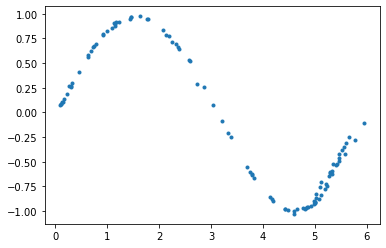

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

# EIS GAN

## Setup

In [1]:
!pip install fastai==2.5.3 -q

     |████████████████████████████████| 189 kB 8.5 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:41tcmalloc: large alloc 1147494400 bytes == 0x39932000 @  0x7f2049358615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 881.9 MB 1.8 kB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 80.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.10.2 which is incompatible.
torchaudio 0.11.0+cu113 requires tor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision.all import *
import sys

In [4]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell
external_python_file_path="'/.'"
sys.path.append(external_python_file_path)


from eb_ml_colab_utils import get_root_path,copy_model_to_google_drive
from eb_ml_battery_lib import load_soc_dataset,generate_image_files_from_eis
from eb_ml_utils import save_model_weights,build_data_loader,build_and_train_learner,score_model

## Load data from EIS Dataset

In [5]:
#configuration dictionary
config ={}

# Root working folder (local or Google Drive)
# config['ROOT_DIR'] = get_root_path("batterie")
config['ROOT_DIR'] = get_root_path("batterie")  

# Folder with dataset in CSV format
#config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets"
config['DATASETS_DIR'] = config['ROOT_DIR']+"/datasets/EIS-vs-SOC-2022"

# List of SoC level into dataset
#config['soc_list']=['100','090','080','070','060','050','040','030','020','010']
config['soc_list']=['100','090','080','070','060','050','040','030','020','010']


# Folder to store trained model
#config['MODELS_DIR'] = config['ROOT_DIR']+"/models"
config['MODELS_DIR'] = config['ROOT_DIR']+"/models"

Running on COLAB
Mounted at /gdrive


In [9]:
# Data acquition file to load from dateset folder
# EIS Dataset https://data.mendeley.com/datasets/ch3sydbbrg/2
frequency_list=[ 0.05, 0.1, 0.2, 0.4, 1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]
battery_list=[1,2,3,4,5,7,8,9,10,11,12] # Data acquitions 6,13 to be used for TEST]
dataset,feature_col_names=load_soc_dataset(battery_list,config["soc_list"],config['DATASETS_DIR'])

In [7]:
feature_col_names

['Z_f0',
 'Z_f1',
 'Z_f2',
 'Z_f3',
 'Z_f4',
 'Z_f5',
 'Z_f6',
 'Z_f7',
 'Z_f8',
 'Z_f9',
 'Z_f10',
 'Z_f11',
 'Z_f12',
 'Z_f13']

In [8]:
dataset

,SOC,BATTERY,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
100,100,1,0.075041-0.004793j,0.073999-0.003214j,0.073267-0.002382j,0.072704-0.002013j,0.071689-0.002063j,0.071109-0.002271j,0.070334-0.003086j,0.068127-0.005205j,0.065212-0.006356j,0.061587-0.006771j,0.057341-0.006501j,0.054366-0.005494j,0.052089-0.004712j,0.049729-0.003129j
090,090,1,0.072146-0.005117j,0.070588-0.003815j,0.069388-0.002898j,0.068809-0.001988j,0.067690-0.001872j,0.067334-0.002119j,0.066712-0.002403j,0.065058-0.003811j,0.062823-0.005048j,0.059913-0.005573j,0.056144-0.005644j,0.053652-0.005176j,0.051474-0.004079j,0.049119-0.002893j
080,080,1,0.070674-0.005346j,0.068942-0.004131j,0.068001-0.002939j,0.067290-0.002149j,0.066002-0.001756j,0.065556-0.001861j,0.065059-0.002163j,0.063415-0.003567j,0.061683-0.004496j,0.059333-0.005229j,0.055601-0.005266j,0.053397-0.004634j,0.051120-0.004001j,0.049108-0.002788j
070,070,1,0.069776-0.005429j,0.068026-0.004174j,0.066787-0.002856j,0.066142-0.002264j,0.065083-0.001689j,0.064663-0.001854j,0.064244-0.002077j,0.062799-0.003086j,0.061226-0.004091j,0.058823-0.004900j,0.055599-0.005055j,0.053120-0.004408j,0.051124-0.003760j,0.049217-0.002700j
060,060,1,0.068619-0.003835j,0.066856-0.003433j,0.065669-0.002385j,0.065318-0.001635j,0.064353-0.001256j,0.064194-0.001438j,0.063642-0.001943j,0.062633-0.002851j,0.060878-0.003915j,0.058778-0.004488j,0.055450-0.004770j,0.053168-0.004471j,0.051296-0.003754j,0.049280-0.002554j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
050,050,12,0.066838-0.003387j,0.065691-0.002782j,0.064725-0.001848j,0.064489-0.001257j,0.063937-0.001282j,0.063576-0.001478j,0.063022-0.002070j,0.061751-0.003190j,0.059947-0.004180j,0.057616-0.004843j,0.054252-0.005002j,0.051883-0.004638j,0.049809-0.004032j,0.047679-0.002806j
040,040,12,0.067117-0.002945j,0.066125-0.002363j,0.065436-0.001568j,0.065134-0.001194j,0.064666-0.001197j,0.064336-0.001530j,0.063877-0.002105j,0.062349-0.003385j,0.060522-0.004324j,0.058125-0.005022j,0.054686-0.005144j,0.052267-0.004772j,0.050121-0.004039j,0.047939-0.002920j
030,030,12,0.067911-0.003051j,0.066866-0.002481j,0.066155-0.001567j,0.065970-0.001238j,0.065450-0.001211j,0.065132-0.001565j,0.064459-0.002198j,0.063056-0.003541j,0.061154-0.004581j,0.058619-0.005216j,0.055024-0.005296j,0.052595-0.004868j,0.050440-0.004087j,0.048248-0.002892j
020,020,12,0.069220-0.003144j,0.068050-0.002673j,0.067222-0.001715j,0.066937-0.001282j,0.066386-0.001316j,0.065963-0.001670j,0.065322-0.002329j,0.063854-0.003676j,0.061771-0.004719j,0.059220-0.005465j,0.055456-0.005444j,0.052958-0.004847j,0.050820-0.004088j,0.048612-0.002911j


In [16]:
soc_10_training=dataset.query('SOC== "010"')[feature_col_names]
soc_10_training

,Z_f0,Z_f1,Z_f2,Z_f3,Z_f4,Z_f5,Z_f6,Z_f7,Z_f8,Z_f9,Z_f10,Z_f11,Z_f12,Z_f13
010,0.079771-0.005349j,0.077740-0.004683j,0.076173-0.003523j,0.075399-0.003229j,0.073304-0.003548j,0.071919-0.004337j,0.069978-0.004903j,0.066565-0.005511j,0.063821-0.005493j,0.061411-0.005366j,0.057958-0.005174j,0.055633-0.004818j,0.053745-0.004118j,0.051447-0.003001j
010,0.078894-0.004942j,0.077379-0.003965j,0.076076-0.003162j,0.075439-0.002577j,0.073901-0.002919j,0.072642-0.003744j,0.070944-0.004596j,0.067612-0.005322j,0.064984-0.005585j,0.062448-0.005382j,0.059086-0.005205j,0.056763-0.004722j,0.054563-0.004204j,0.052500-0.002999j
010,0.074923-0.004870j,0.073477-0.003759j,0.072532-0.002710j,0.071758-0.002316j,0.070510-0.002377j,0.069565-0.003037j,0.068364-0.003993j,0.065447-0.005366j,0.062517-0.006183j,0.059429-0.006285j,0.055555-0.005599j,0.053129-0.004991j,0.050902-0.004287j,0.048653-0.003007j
010,0.074411-0.004880j,0.072787-0.003883j,0.071541-0.003067j,0.070933-0.002429j,0.069589-0.002628j,0.068560-0.003292j,0.067239-0.003997j,0.064362-0.005227j,0.061435-0.005945j,0.058558-0.005913j,0.054922-0.005389j,0.052485-0.004896j,0.050414-0.004192j,0.048036-0.003069j
010,0.078197-0.004944j,0.076708-0.003921j,0.075516-0.002831j,0.074972-0.002334j,0.073589-0.002613j,0.072889-0.003227j,0.071461-0.004222j,0.068578-0.005554j,0.065428-0.006255j,0.062342-0.006436j,0.058299-0.005866j,0.055709-0.005264j,0.053496-0.004382j,0.051192-0.003051j
010,0.073499-0.004352j,0.071975-0.003375j,0.071127-0.002276j,0.070579-0.001976j,0.069628-0.001913j,0.069061-0.002316j,0.068349-0.002973j,0.066075-0.004737j,0.063371-0.005850j,0.060204-0.006134j,0.056277-0.005871j,0.053678-0.004992j,0.051553-0.004286j,0.049336-0.002925j
010,0.075002-0.004450j,0.073594-0.003316j,0.072728-0.002386j,0.072421-0.002074j,0.071293-0.002048j,0.070492-0.002500j,0.069626-0.003237j,0.067319-0.004893j,0.064682-0.005829j,0.061710-0.006009j,0.057768-0.005385j,0.055370-0.004826j,0.053423-0.003888j,0.051324-0.002779j
010,0.079897-0.004582j,0.078391-0.003490j,0.077319-0.002565j,0.076870-0.001969j,0.075815-0.002046j,0.075152-0.002592j,0.074303-0.003259j,0.071812-0.004872j,0.069079-0.005790j,0.065966-0.006023j,0.062122-0.005708j,0.059560-0.004794j,0.057592-0.003948j,0.055631-0.002843j
010,0.077036-0.004560j,0.075534-0.003552j,0.074379-0.002565j,0.073773-0.002133j,0.072797-0.002270j,0.072098-0.002704j,0.071250-0.003512j,0.068566-0.005268j,0.065698-0.006345j,0.062095-0.006770j,0.057652-0.006236j,0.054922-0.005423j,0.052739-0.004440j,0.050409-0.003261j
010,0.097612-0.004647j,0.095967-0.003856j,0.094797-0.002671j,0.094201-0.002246j,0.093193-0.002260j,0.092317-0.002724j,0.091361-0.003504j,0.088793-0.004872j,0.086085-0.005751j,0.083177-0.006003j,0.079377-0.005685j,0.076842-0.005000j,0.074681-0.004194j,0.072418-0.002935j


In [57]:
total_EIS_num = len(soc_10_training)
n_frequency =len(frequency_list)
train_data_length = total_EIS_num * n_frequency  #14*11

# initialize train_data, a tensor with dimensions of <train_data_length> rows and 2 columns, all containing zeros. 
# Note: A tensor is a multidimensional array similar to a NumPy array.
train_data = torch.empty((train_data_length,2),dtype=torch.complex128)

In [59]:
from operator import mod

for i  in range(0,train_data_length):
  f_index = i % 14
  row_index = i // 14
  # the first column of train_data store the frequency values
  train_data[i, 0] = frequency_list[f_index]
  # the second column of the tensor  Z(f)
  train_data[i, 1] = tensor(soc_10_training)[row_index,f_index]
  

In [64]:

# init tensor of labels, which are required by PyTorch’s data loader. 
# Since GANs make use of unsupervised learning techniques, the labels can be anything.
train_labels = torch.zeros(train_data_length)

# create train_set as a list of tuples, with each row of train_data and train_labels represented in each tuple 
# this is the format expected by PyTorch’s data loader.
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [66]:
!pip install complexPyTorch

  Created wheel for complexPyTorch: filename=complexPyTorch-0.4-py3-none-any.whl size=7662 sha256=b98c9669eb69b530a95a550b4c59522a3dd81dc8f9845cafcfbbbc21c616ca5c
  Stored in directory: /root/.cache/pip/wheels/a5/f7/49/a81d651d5c7c5621afc258c7396821f87830b898a7762265ab
Successfully built complexPyTorch


In [70]:
from complexPyTorch.complexLayers import ComplexLinear
from complexPyTorch.complexFunctions import complex_relu, complex_max_pool2d

In [76]:
from torch.nn.modules.dropout import Dropout
# This discriminator is an MLP neural network 
class ComplexDiscriminator(nn.Module):
    def __init__(self):
        super(ComplexNet, self).__init__()
        #The input is two-dimensional, and the first hidden layer is composed 
        # of 256 neurons with ReLU activation.
        self.lin1=ComplexLinear(2, 256)
        self.ComplexReLU1 = self.ReLU(),
        # use dropout after hidden layer to avoid overfitting.
        self.Dropout01=Dropout(0.3),
        self.lin2 = self.ComplexLinear(256, 128),
        self.ComplexReLU2 = self.ReLU(),
        self.Dropout02= Dropout(0.3) 
        self.ComplexReLU3= ComplexLinear(128, 64),
        self.ComplexReLU3 = self.ReLU(),
        self.Dropout(0.3),
        self.ComplexLinear(64, 1),
        # The output is composed of a single neuron with sigmoidal activation
        # to represent a probability.
        self.Sigmoid(),
        

     # .forward() to describe how the output of the model is calculated
    def forward(self, x):
        output = self.lin1(x)
        output = self.ComplexReLU1(x)
        output = self.Dropout01(x)
        output = self.lin2(x)
        self.ComplexReLU2 
        return output

# instantiate a Discriminator object
discriminator = ComplexDiscriminator()

NameError: ignored